In [1]:
import numpy as np

In [2]:
def measure_perception_error(base_list, modified_list):
    assert len(base_list) == len(modified_list)
    temp_base_mask = np.logical_or.reduce(base_list, axis=0)
    temp_modified_mask = np.logical_or.reduce(modified_list, axis=0)

    intersection = np.logical_and(temp_base_mask, temp_modified_mask)
    intersection_sum = np.sum(intersection)

    base_mask_sum = np.sum(temp_base_mask)
    modified_mask_sum = np.sum(temp_modified_mask)

    total_error = base_mask_sum - modified_mask_sum
    return total_error, intersection_sum, base_mask_sum

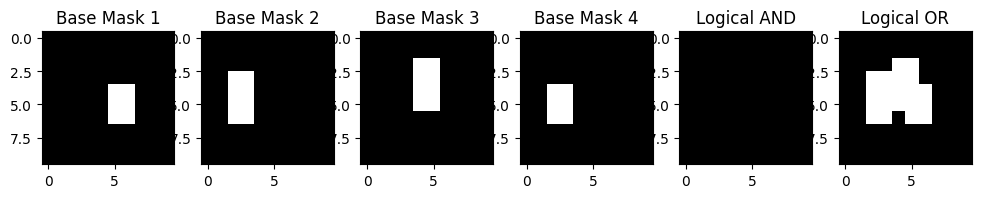

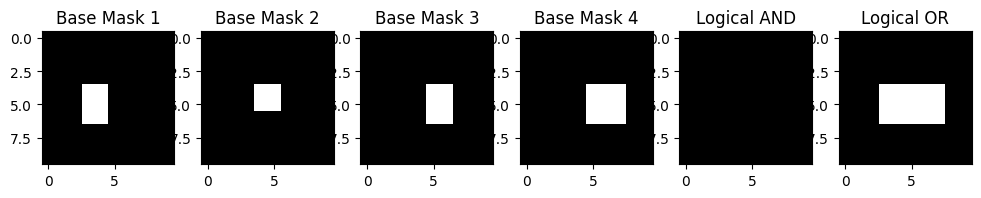

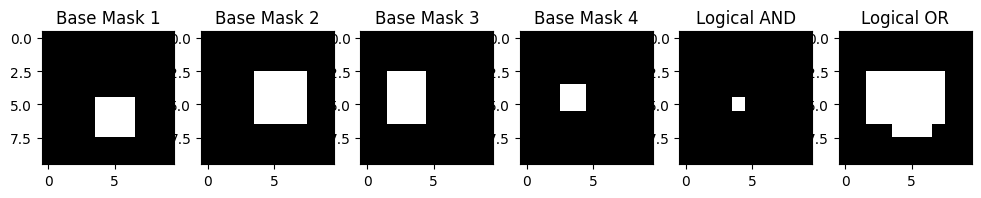

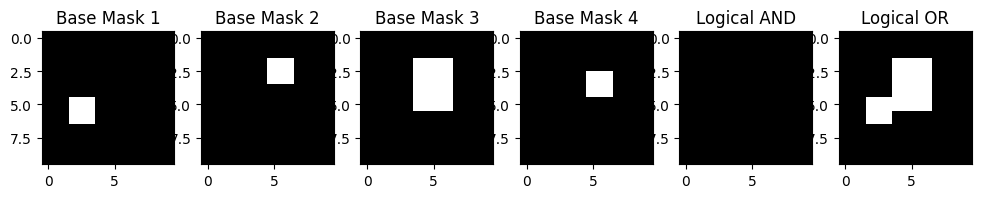

In [3]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

def generate_masks():
    base_masks = []
    for _ in range(4):
        base_mask = np.zeros((10, 10))
        x = np.random.randint(2, 6)
        y = np.random.randint(2, 6)
        width = np.random.randint(2, 5)
        height = np.random.randint(2, 5)
        base_mask[x:x+width, y:y+height] = 1
        base_masks.append(base_mask)
    return base_masks


def plot_masks(base_masks):
    # Perform logical AND operation on the masks
    logical_and = np.logical_and.reduce(base_masks)
    logical_or = np.logical_or.reduce(base_masks)

    # Plot the base masks and the logical AND operation
    plt.figure(figsize=(12, 4))
    for i in range(4):
        plt.subplot(1, 6, i+1)
        plt.imshow(base_masks[i], cmap='gray')
        plt.title(f'Base Mask {i+1}')
    plt.subplot(1, 6, 5)
    plt.imshow(logical_and, cmap='gray')
    plt.title('Logical AND')

    plt.subplot(1, 6, 6)
    plt.imshow(logical_or, cmap='gray')
    plt.title('Logical OR')

    plt.show()


base_masks1 = generate_masks()
plot_masks(base_masks1)

base_masks2 = generate_masks()
plot_masks(base_masks2)

modified_masks1 = generate_masks()
plot_masks(modified_masks1)

modified_masks2 = generate_masks()
plot_masks(modified_masks2)

In [4]:
# create a random array of boolean values with shape (2, 4, 192, 192)
base_arr = [base_masks1, base_masks2]
modified_arr = [modified_masks1, modified_masks2]

total_error, intersection_sum, base_mask_sum = measure_perception_error(base_arr, modified_arr)
print(total_error, intersection_sum, base_mask_sum)

-9 26 51


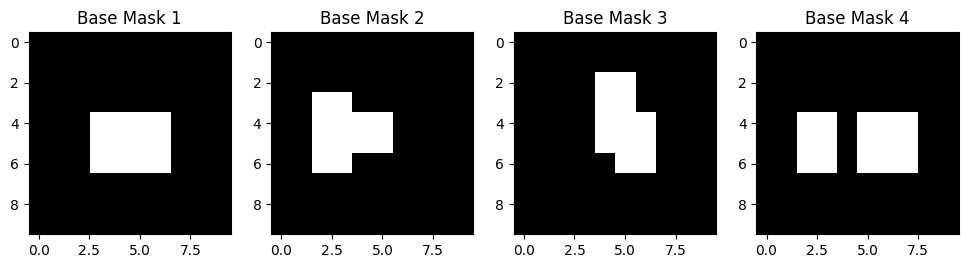

-9


In [5]:
base_arr_masks = np.logical_or.reduce(base_arr, axis=0)
modified_arr_masks = np.logical_or.reduce(modified_arr, axis=0)

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(base_arr_masks[i], cmap='gray')
    plt.title(f'Base Mask {i+1}')
plt.show()

base_arr_masks_sum = np.sum(base_arr_masks)
modified_arr_masks_sum = np.sum(modified_arr_masks)

print(base_arr_masks_sum - modified_arr_masks_sum)


In [6]:
# test1 = [base_arr1, base_arr2]
# test2 = [modified_arr1, modified_arr2]

# # plot the base_arr1 which has 4 2x2 boolean arrays
# print(base_arr1, base_arr1.shape)
# print(base_arr2, base_arr2.shape)
# print(modified_arr1, modified_arr1.shape)
# print(modified_arr2, modified_arr2.shape)
